

<center><h1><b> Project 4 - Group 63 </h1> </center>
<center><h2>Saad Shahbaz, Sym Piracha, Ibrahim Naveed </h2></center>






## **Import statments and device setup**

In [ ]:
import math
import torch
import torch.nn as nn
import torch.nn.init as init
import torch.utils.model_zoo as model_zoo
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time, copy, os
import torchvision.transforms as transforms
import pandas as pd
from torch.utils.data import Dataset, DataLoader
import warnings
warnings.filterwarnings("ignore")

In [ ]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")

## **Hyperparameters**

In [ ]:
batch_size = 16
num_classes = 10
epochs = 36
learning_rate = 0.001 
momentum = 0.9

## **Process datasets**

In [ ]:
transform_cifar = transforms.Compose(
    [transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))]
    )
transform_fashion = transforms.Compose(
    [transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.repeat(3, 1, 1)),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))]
    )

# Cifar 10
#download train and test data + create dataloaders for them
train_data_cifar = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_cifar)
trainloader_cifar = torch.utils.data.DataLoader(train_data_cifar, batch_size=batch_size, shuffle=True)

test_data_cifar = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_cifar)
testloader_cifar = torch.utils.data.DataLoader(test_data_cifar, batch_size=batch_size, shuffle=False)


# FashionMNIST
# download train and test data + create dataloaders for them
train_data_fashion = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform_fashion)
trainloader_fashion = torch.utils.data.DataLoader(train_data_fashion, batch_size=batch_size, shuffle=True)

test_data_fashion = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform_fashion)
testloader_fashion = torch.utils.data.DataLoader(test_data_fashion, batch_size=batch_size, shuffle=False)


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



## **Visualize CIFAR data**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


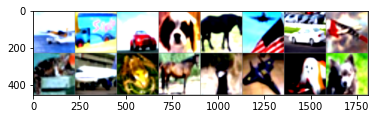

airplane
truck
automobile
dog
horse
airplane
automobile
airplane
cat
airplane
frog
horse
bird
airplane
dog
dog


In [ ]:
classification = {0: 'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}
#Function to show some random images
## viewing the first image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

data = iter(trainloader_cifar)

images, label = data.next()

imshow(torchvision.utils.make_grid(images))
for i in range(16):
  label_value = int(label[i].numpy())
  print(classification[label_value])

## **Different Models:**

### **AlexNet**

#### AlexNet for CIFAR 10

In [ ]:
model_alex_net = torch.hub.load('pytorch/vision:v0.6.0', 'alexnet', pretrained=True)
## We need to change our last layer as we have 10 classes instead of a 1000:
model_alex_net.classifier[6] = nn.Linear(4096,num_classes, bias=True)
model_alex_net.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_alex_net.parameters(), lr=learning_rate, momentum=momentum)
evaluate_model(model_alex_net,trainloader_cifar,testloader_cifar)

Downloading: "https://github.com/pytorch/vision/archive/v0.6.0.zip" to /root/.cache/torch/hub/v0.6.0.zip
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

Epoch: 1/36..  Training Loss: 0.684..  Test Loss: 0.490..  Test Accuracy: 0.829
Epoch: 2/36..  Training Loss: 0.424..  Test Loss: 0.391..  Test Accuracy: 0.865
Epoch: 3/36..  Training Loss: 0.325..  Test Loss: 0.339..  Test Accuracy: 0.884
Epoch: 4/36..  Training Loss: 0.255..  Test Loss: 0.354..  Test Accuracy: 0.880
Epoch: 5/36..  Training Loss: 0.209..  Test Loss: 0.366..  Test Accuracy: 0.875
Epoch: 6/36..  Training Loss: 0.167..  Test Loss: 0.327..  Test Accuracy: 0.894
Epoch: 7/36..  Training Loss: 0.137..  Test Loss: 0.378..  Test Accuracy: 0.886
Epoch: 8/36..  Training Loss: 0.114..  Test Loss: 0.379..  Test Accuracy: 0.881
Epoch: 9/36..  Training Loss: 0.099..  Test Loss: 0.353..  Test Accuracy: 0.898
Epoch: 10/36..  Training Loss: 0.087..  Test Loss: 0.344..  Test Accuracy: 0.903
Epoch: 11/36..  Training Loss: 0.073..  Test Loss: 0.404..  Test Accuracy: 0.889
Epoch: 12/36..  Training Loss: 0.073..  Test Loss: 0.388..  Test Accuracy: 0.896
Epoch: 13/36..  Training Loss: 0.058.

#### AlexNet for Fashion-MNIST

In [ ]:
model_alex_net = torch.hub.load('pytorch/vision:v0.6.0', 'alexnet', pretrained=True)
## We need to change our last layer as we have 10 classes instead of a 1000:
model_alex_net.classifier[6] = nn.Linear(4096,num_classes, bias=True)
model_alex_net.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_alex_net.parameters(), lr=learning_rate, momentum=momentum)
evaluate_model(model_alex_net,trainloader_fashion,testloader_fashion)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.6.0


Epoch: 1/36..  Training Loss: 0.405..  Test Loss: 0.316..  Test Accuracy: 0.884
Epoch: 2/36..  Training Loss: 0.270..  Test Loss: 0.273..  Test Accuracy: 0.904
Epoch: 3/36..  Training Loss: 0.233..  Test Loss: 0.235..  Test Accuracy: 0.914
Epoch: 4/36..  Training Loss: 0.203..  Test Loss: 0.249..  Test Accuracy: 0.909
Epoch: 5/36..  Training Loss: 0.183..  Test Loss: 0.222..  Test Accuracy: 0.918
Epoch: 6/36..  Training Loss: 0.165..  Test Loss: 0.216..  Test Accuracy: 0.924
Epoch: 7/36..  Training Loss: 0.151..  Test Loss: 0.211..  Test Accuracy: 0.923
Epoch: 8/36..  Training Loss: 0.136..  Test Loss: 0.206..  Test Accuracy: 0.929
Epoch: 9/36..  Training Loss: 0.123..  Test Loss: 0.248..  Test Accuracy: 0.920
Epoch: 10/36..  Training Loss: 0.114..  Test Loss: 0.235..  Test Accuracy: 0.922
Epoch: 11/36..  Training Loss: 0.104..  Test Loss: 0.218..  Test Accuracy: 0.927
Epoch: 12/36..  Training Loss: 0.092..  Test Loss: 0.218..  Test Accuracy: 0.931
Epoch: 13/36..  Training Loss: 0.086.

### **SqueezeNet**

#### SqueezeNet for CIFAR 10

In [ ]:
model_squeeze_net = torch.hub.load('pytorch/vision:v0.6.0', 'squeezenet1_1', pretrained=True)
# we need to change our last layer as we have 10 classes instead of a 1000:
model_squeeze_net.classifier[1] = nn.Conv2d(512, num_classes, kernel_size=(1,1), stride=(1,1))
model_squeeze_net.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_squeeze_net.parameters(), lr=learning_rate,momentum=momentum)
evaluate_model(model_squeeze_net, trainloader_cifar, testloader_cifar)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.6.0
Downloading: "https://download.pytorch.org/models/squeezenet1_1-b8a52dc0.pth" to /root/.cache/torch/hub/checkpoints/squeezenet1_1-b8a52dc0.pth


  0%|          | 0.00/4.73M [00:00<?, ?B/s]

Epoch: 1/36..  Training Loss: 0.715..  Test Loss: 0.532..  Test Accuracy: 0.813
Epoch: 2/36..  Training Loss: 0.447..  Test Loss: 0.464..  Test Accuracy: 0.840
Epoch: 3/36..  Training Loss: 0.367..  Test Loss: 0.409..  Test Accuracy: 0.858
Epoch: 4/36..  Training Loss: 0.318..  Test Loss: 0.410..  Test Accuracy: 0.860
Epoch: 5/36..  Training Loss: 0.285..  Test Loss: 0.347..  Test Accuracy: 0.886
Epoch: 6/36..  Training Loss: 0.251..  Test Loss: 0.377..  Test Accuracy: 0.872
Epoch: 7/36..  Training Loss: 0.230..  Test Loss: 0.343..  Test Accuracy: 0.883
Epoch: 8/36..  Training Loss: 0.207..  Test Loss: 0.356..  Test Accuracy: 0.885
Epoch: 9/36..  Training Loss: 0.188..  Test Loss: 0.326..  Test Accuracy: 0.895
Epoch: 10/36..  Training Loss: 0.170..  Test Loss: 0.324..  Test Accuracy: 0.895
Epoch: 11/36..  Training Loss: 0.163..  Test Loss: 0.300..  Test Accuracy: 0.901
Epoch: 12/36..  Training Loss: 0.146..  Test Loss: 0.337..  Test Accuracy: 0.899
Epoch: 13/36..  Training Loss: 0.132.

#### SqueezeNet for Fashion-MNIST

In [ ]:
model_squeeze_net = torch.hub.load('pytorch/vision:v0.6.0', 'squeezenet1_1', pretrained=True)
# we need to change our last layer as we have 10 classes instead of a 1000:
model_squeeze_net.classifier[1] = nn.Conv2d(512, num_classes, kernel_size=(1,1), stride=(1,1))
model_squeeze_net.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_squeeze_net.parameters(), lr=learning_rate,momentum=momentum)
evaluate_model(model_squeeze_net, trainloader_fashion, testloader_fashion)

Downloading: "https://github.com/pytorch/vision/archive/v0.6.0.zip" to /root/.cache/torch/hub/v0.6.0.zip
Downloading: "https://download.pytorch.org/models/squeezenet1_1-b8a52dc0.pth" to /root/.cache/torch/hub/checkpoints/squeezenet1_1-b8a52dc0.pth


  0%|          | 0.00/4.73M [00:00<?, ?B/s]

Epoch: 1/36..  Training Loss: 0.408..  Test Loss: 0.308..  Test Accuracy: 0.888
Epoch: 2/36..  Training Loss: 0.273..  Test Loss: 0.275..  Test Accuracy: 0.900
Epoch: 3/36..  Training Loss: 0.239..  Test Loss: 0.255..  Test Accuracy: 0.909
Epoch: 4/36..  Training Loss: 0.217..  Test Loss: 0.225..  Test Accuracy: 0.919
Epoch: 5/36..  Training Loss: 0.200..  Test Loss: 0.243..  Test Accuracy: 0.912
Epoch: 6/36..  Training Loss: 0.188..  Test Loss: 0.212..  Test Accuracy: 0.924
Epoch: 7/36..  Training Loss: 0.178..  Test Loss: 0.210..  Test Accuracy: 0.924
Epoch: 8/36..  Training Loss: 0.167..  Test Loss: 0.215..  Test Accuracy: 0.924
Epoch: 9/36..  Training Loss: 0.159..  Test Loss: 0.214..  Test Accuracy: 0.926
Epoch: 10/36..  Training Loss: 0.151..  Test Loss: 0.236..  Test Accuracy: 0.918
Epoch: 11/36..  Training Loss: 0.145..  Test Loss: 0.205..  Test Accuracy: 0.931
Epoch: 12/36..  Training Loss: 0.137..  Test Loss: 0.201..  Test Accuracy: 0.932
Epoch: 13/36..  Training Loss: 0.130.

### **ShuffleNet**

#### ShuffleNet for CIFAR 10

In [ ]:
model_shufflenet = torch.hub.load('pytorch/vision:v0.6.0', 'shufflenet_v2_x0_5', pretrained=True)
## As we can see we need to change our last layer as we have 10 classes instead of a 1000:
model_shufflenet.fc = nn.Linear(1024,num_classes, bias=True)
model_shufflenet.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_shufflenet.parameters(), lr=learning_rate,momentum=momentum)
evaluate_model(model_shufflenet, trainloader_cifar, testloader_cifar)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.6.0
Downloading: "https://download.pytorch.org/models/shufflenetv2_x0.5-f707e7126e.pth" to /root/.cache/torch/hub/checkpoints/shufflenetv2_x0.5-f707e7126e.pth


  0%|          | 0.00/5.28M [00:00<?, ?B/s]

Epoch: 1/36..  Training Loss: 2.176..  Test Loss: 1.784..  Test Accuracy: 0.570
Epoch: 2/36..  Training Loss: 1.319..  Test Loss: 0.827..  Test Accuracy: 0.735
Epoch: 3/36..  Training Loss: 0.819..  Test Loss: 0.571..  Test Accuracy: 0.813
Epoch: 4/36..  Training Loss: 0.641..  Test Loss: 0.476..  Test Accuracy: 0.838
Epoch: 5/36..  Training Loss: 0.544..  Test Loss: 0.417..  Test Accuracy: 0.855
Epoch: 6/36..  Training Loss: 0.483..  Test Loss: 0.385..  Test Accuracy: 0.871
Epoch: 7/36..  Training Loss: 0.434..  Test Loss: 0.352..  Test Accuracy: 0.878
Epoch: 8/36..  Training Loss: 0.399..  Test Loss: 0.345..  Test Accuracy: 0.882
Epoch: 9/36..  Training Loss: 0.372..  Test Loss: 0.326..  Test Accuracy: 0.887
Epoch: 10/36..  Training Loss: 0.344..  Test Loss: 0.324..  Test Accuracy: 0.888
Epoch: 11/36..  Training Loss: 0.322..  Test Loss: 0.313..  Test Accuracy: 0.895
Epoch: 12/36..  Training Loss: 0.308..  Test Loss: 0.305..  Test Accuracy: 0.897
Epoch: 13/36..  Training Loss: 0.287.

ShuffleNet for Fashion-MNIST

In [ ]:
model_shufflenet = torch.hub.load('pytorch/vision:v0.6.0', 'shufflenet_v2_x0_5', pretrained=True)
## As we can see we need to change our last layer as we have 10 classes instead of a 1000:
model_shufflenet.fc = nn.Linear(1024,num_classes, bias=True)
model_shufflenet.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_shufflenet.parameters(), lr=learning_rate,momentum=momentum)
evaluate_model(model_shufflenet, trainloader_fashion, testloader_fashion)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.6.0


Epoch: 1/36..  Training Loss: 1.822..  Test Loss: 1.015..  Test Accuracy: 0.750
Epoch: 2/36..  Training Loss: 0.719..  Test Loss: 0.437..  Test Accuracy: 0.847
Epoch: 3/36..  Training Loss: 0.426..  Test Loss: 0.307..  Test Accuracy: 0.896
Epoch: 4/36..  Training Loss: 0.332..  Test Loss: 0.264..  Test Accuracy: 0.909
Epoch: 5/36..  Training Loss: 0.279..  Test Loss: 0.231..  Test Accuracy: 0.918
Epoch: 6/36..  Training Loss: 0.253..  Test Loss: 0.226..  Test Accuracy: 0.919
Epoch: 7/36..  Training Loss: 0.231..  Test Loss: 0.215..  Test Accuracy: 0.922
Epoch: 8/36..  Training Loss: 0.214..  Test Loss: 0.215..  Test Accuracy: 0.924
Epoch: 9/36..  Training Loss: 0.203..  Test Loss: 0.209..  Test Accuracy: 0.926
Epoch: 10/36..  Training Loss: 0.190..  Test Loss: 0.201..  Test Accuracy: 0.929
Epoch: 11/36..  Training Loss: 0.181..  Test Loss: 0.202..  Test Accuracy: 0.928
Epoch: 12/36..  Training Loss: 0.171..  Test Loss: 0.196..  Test Accuracy: 0.931
Epoch: 13/36..  Training Loss: 0.162.

### **Mini Project 3 Model**

Architecture for the Model

In [ ]:
## As we can see we need to change our last layer as we have 10 classes instead of 36 as per our mini project # 3:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(p=0.2)
        self.batchnorm32 = nn.BatchNorm2d(32)
        self.batchnorm64 = nn.BatchNorm2d(64)
        self.batchnorm128 = nn.BatchNorm2d(128)
        self.conv1 = nn.Conv2d(3, 32, 3, padding='same')
        self.conv2 = nn.Conv2d(32, 32, 3, padding='same')
        self.conv3 = nn.Conv2d(32, 32, 3, padding='same')
        self.conv4 = nn.Conv2d(32, 64, 3, padding='same')
        self.conv5 = nn.Conv2d(64, 64, 3, padding='same')
        self.conv6 = nn.Conv2d(64, 128, 3, padding='same')
        self.conv7 = nn.Conv2d(128, 128, 3, padding='same')
        self.conv8 = nn.Conv2d(128, 128, 3, padding='same')
        self.fc1 = nn.Linear(512 * 7 * 7, 144)
        self.fc2 = nn.Linear(144, 108)
        self.fc3 = nn.Linear(108, 10)

        # output size = input - kernel/stride + padding

    def forward(self, x):
        x = F.relu(self.conv1(x))
        #print("After c1", x.shape)
        x = self.batchnorm32(x)
        x = self.pool(F.relu(self.conv2(x)))
        x = self.batchnorm32(x)
        x = F.relu(self.conv3(x))
        x = self.batchnorm32(x)
        x = self.dropout(x)
        x = self.pool(F.relu(self.conv4(x)))
        x = self.batchnorm64(x)
        x = F.relu(self.conv5(x))
        x = self.batchnorm64(x)
        x = self.pool(F.relu(self.conv6(x)))
        x = self.batchnorm128(x)
        x = F.relu(self.conv7(x))
        x = self.pool(F.relu(self.conv8(x)))
        #16, 128, 14, 14
        x = self.batchnorm128(x)
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        #16, 25088
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x

Mini 3 for CIFAR 10

In [ ]:
mini3_net = ConvNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(mini3_net.parameters(), lr=learning_rate,momentum=momentum)
evaluate_model(mini3_net, trainloader_cifar, testloader_cifar)

Epoch: 1/36..  Training Loss: 1.344..  Test Loss: 2.952..  Test Accuracy: 0.294
Epoch: 2/36..  Training Loss: 0.883..  Test Loss: 5.242..  Test Accuracy: 0.235
Epoch: 3/36..  Training Loss: 0.642..  Test Loss: 7.754..  Test Accuracy: 0.186
Epoch: 4/36..  Training Loss: 0.437..  Test Loss: 11.797..  Test Accuracy: 0.138
Epoch: 5/36..  Training Loss: 0.285..  Test Loss: 16.818..  Test Accuracy: 0.112
Epoch: 6/36..  Training Loss: 0.185..  Test Loss: 14.873..  Test Accuracy: 0.222
Epoch: 7/36..  Training Loss: 0.132..  Test Loss: 17.485..  Test Accuracy: 0.212
Epoch: 8/36..  Training Loss: 0.111..  Test Loss: 17.145..  Test Accuracy: 0.238
Epoch: 9/36..  Training Loss: 0.086..  Test Loss: 19.318..  Test Accuracy: 0.204
Epoch: 10/36..  Training Loss: 0.073..  Test Loss: 20.619..  Test Accuracy: 0.196
Epoch: 11/36..  Training Loss: 0.067..  Test Loss: 19.730..  Test Accuracy: 0.250
Epoch: 12/36..  Training Loss: 0.053..  Test Loss: 20.957..  Test Accuracy: 0.247
Epoch: 13/36..  Training Los

Mini 3 for Fashion-MNIST

In [ ]:
mini3_net = ConvNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(mini3_net.parameters(), lr=learning_rate,momentum=momentum)
evaluate_model(mini3_net, trainloader_fashion, testloader_fashion)

Epoch: 1/36..  Training Loss: 0.382..  Test Loss: 0.423..  Test Accuracy: 0.837
Epoch: 2/36..  Training Loss: 0.227..  Test Loss: 0.592..  Test Accuracy: 0.798
Epoch: 3/36..  Training Loss: 0.173..  Test Loss: 0.635..  Test Accuracy: 0.783
Epoch: 4/36..  Training Loss: 0.130..  Test Loss: 1.813..  Test Accuracy: 0.621
Epoch: 5/36..  Training Loss: 0.096..  Test Loss: 1.838..  Test Accuracy: 0.605
Epoch: 6/36..  Training Loss: 0.067..  Test Loss: 2.039..  Test Accuracy: 0.641
Epoch: 7/36..  Training Loss: 0.047..  Test Loss: 1.171..  Test Accuracy: 0.763
Epoch: 8/36..  Training Loss: 0.033..  Test Loss: 2.684..  Test Accuracy: 0.588
Epoch: 9/36..  Training Loss: 0.025..  Test Loss: 1.926..  Test Accuracy: 0.687
Epoch: 10/36..  Training Loss: 0.022..  Test Loss: 2.116..  Test Accuracy: 0.674
Epoch: 11/36..  Training Loss: 0.022..  Test Loss: 1.610..  Test Accuracy: 0.747
Epoch: 12/36..  Training Loss: 0.016..  Test Loss: 1.641..  Test Accuracy: 0.752
Epoch: 13/36..  Training Loss: 0.012.

### **ISS**

#### ISS for CIFAR 10

In [ ]:
iss = models.squeezenet1_1(pretrained=True)
iss.classifier[1] = nn.Conv2d(512, 128, kernel_size=(1,1), stride=(1,1))
iss.num_classes = 128
iss = nn.Sequential(iss, 
                        nn.Linear(128,64), 
                        nn.Dropout(p=0.1),
                        nn.Linear(64,10), 
                        nn.Dropout(p=0.1))
iss.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(iss.parameters(), lr=learning_rate,momentum=momentum)
evaluate_model(iss, trainloader_cifar, testloader_cifar)

Epoch: 1/36..  Training Loss: 0.934..  Test Loss: 0.577..  Test Accuracy: 0.800
Epoch: 2/36..  Training Loss: 0.622..  Test Loss: 0.486..  Test Accuracy: 0.837
Epoch: 3/36..  Training Loss: 0.533..  Test Loss: 0.490..  Test Accuracy: 0.833
Epoch: 4/36..  Training Loss: 0.478..  Test Loss: 0.389..  Test Accuracy: 0.871
Epoch: 5/36..  Training Loss: 0.432..  Test Loss: 0.392..  Test Accuracy: 0.867
Epoch: 6/36..  Training Loss: 0.403..  Test Loss: 0.375..  Test Accuracy: 0.882
Epoch: 7/36..  Training Loss: 0.375..  Test Loss: 0.362..  Test Accuracy: 0.877
Epoch: 8/36..  Training Loss: 0.352..  Test Loss: 0.338..  Test Accuracy: 0.889
Epoch: 9/36..  Training Loss: 0.330..  Test Loss: 0.371..  Test Accuracy: 0.876
Epoch: 10/36..  Training Loss: 0.309..  Test Loss: 0.329..  Test Accuracy: 0.892
Epoch: 11/36..  Training Loss: 0.295..  Test Loss: 0.342..  Test Accuracy: 0.887
Epoch: 12/36..  Training Loss: 0.278..  Test Loss: 0.306..  Test Accuracy: 0.902
Epoch: 13/36..  Training Loss: 0.273.

#### ISS for Fashion MNIST

In [ ]:
iss = models.squeezenet1_1(pretrained=True)
iss.classifier[1] = nn.Conv2d(512, 128, kernel_size=(1,1), stride=(1,1))
iss.num_classes = 128
iss = nn.Sequential(iss, 
                        nn.Linear(128,64), 
                        nn.Dropout(p=0.1),
                        nn.Linear(64,10), 
                        nn.Dropout(p=0.1))
iss.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(iss.parameters(), lr=learning_rate,momentum=momentum)
evaluate_model(iss, trainloader_fashion, testloader_fashion)

Epoch: 1/36..  Training Loss: 0.605..  Test Loss: 0.347..  Test Accuracy: 0.887
Epoch: 2/36..  Training Loss: 0.404..  Test Loss: 0.280..  Test Accuracy: 0.905
Epoch: 3/36..  Training Loss: 0.361..  Test Loss: 0.272..  Test Accuracy: 0.903
Epoch: 4/36..  Training Loss: 0.331..  Test Loss: 0.261..  Test Accuracy: 0.911
Epoch: 5/36..  Training Loss: 0.311..  Test Loss: 0.235..  Test Accuracy: 0.917
Epoch: 6/36..  Training Loss: 0.294..  Test Loss: 0.223..  Test Accuracy: 0.923
Epoch: 7/36..  Training Loss: 0.284..  Test Loss: 0.221..  Test Accuracy: 0.922
Epoch: 8/36..  Training Loss: 0.273..  Test Loss: 0.257..  Test Accuracy: 0.904
Epoch: 9/36..  Training Loss: 0.263..  Test Loss: 0.208..  Test Accuracy: 0.929
Epoch: 10/36..  Training Loss: 0.254..  Test Loss: 0.219..  Test Accuracy: 0.924
Epoch: 11/36..  Training Loss: 0.246..  Test Loss: 0.238..  Test Accuracy: 0.919
Epoch: 12/36..  Training Loss: 0.240..  Test Loss: 0.212..  Test Accuracy: 0.929
Epoch: 13/36..  Training Loss: 0.233.

## **Helper Methods**

In [ ]:
def evaluate_model(model, trainloader, testloader):
  train_losses, test_losses = [] ,[]
  for epoch in range(epochs):
      running_loss = 0
      for images,labels in trainloader:
          if use_cuda:
              images, labels = images.cuda(), labels.cuda()
          train = Variable(images.view(-1,3,224,224))
          labels = Variable(labels)

          optimizer.zero_grad()

          output = model(train)
          # print(output.size())
          loss = criterion(output,labels)
          loss.backward()
          optimizer.step()

          running_loss += loss.item()
      else:
          test_loss = 0
          accuracy = 0


          with torch.no_grad(): #Turning off gradients to speed up
              model.eval()
              for images,labels in testloader:
                  if use_cuda:
                      images, labels = images.cuda(), labels.cuda()
                  test = Variable(images.view(-1,3,224,224))
                  labels = Variable(labels)

                  log_ps = model(test)
                  test_loss += criterion(log_ps,labels)

                  ps = torch.exp(log_ps)
                  top_p, top_class = ps.topk(1, dim = 1)
                  equals = top_class == labels.view(*top_class.shape)
                  accuracy += torch.mean(equals.type(torch.FloatTensor))
          model.train()        
          train_losses.append(running_loss/len(trainloader))
          test_losses.append(test_loss/len(testloader))

          print("Epoch: {}/{}.. ".format(epoch+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
            "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))